<a href="https://colab.research.google.com/github/sumanjitmoshat/ClassicalML/blob/master/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
# importing packages and libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
import warnings
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings("ignore")

In [132]:
# connecting with kaggle to download the dataset 
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d mlg-ulb/creditcardfraud
! mkdir creditcardfrauddataset
! unzip creditcardfraud.zip -d creditcardfrauddataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
 86% 57.0M/66.0M [00:00<00:00, 54.9MB/s]
100% 66.0M/66.0M [00:00<00:00, 84.8MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcardfrauddataset/creditcard.csv  


In [133]:
cd creditcardfrauddataset/

/content/creditcardfrauddataset/creditcardfrauddataset


In [134]:
creditcardfraud = pd.read_csv('creditcard.csv')

## EDA and Pre-Processing

In [135]:
creditcardfraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [136]:
creditcardfraud.shape

(284807, 31)

In [137]:
creditcardfraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Transforming the time column to extract time taken by each transaction

In [138]:
creditcardfraud.Time = creditcardfraud.Time.diff().fillna(creditcardfraud.Time)

In [139]:
creditcardfraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,0.606699,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,1.053380,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,0.000000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,0.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.000000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,32.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


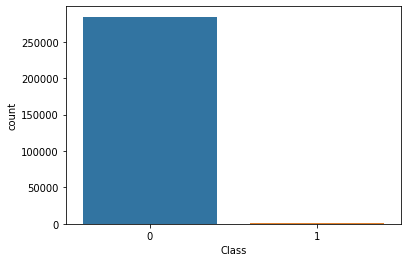

In [140]:
sns.countplot(x='Class',data=creditcardfraud)
plt.show()

## From the above plot it's clear that the dataset is imbalanced

## Creating X and y(target) from the dataset

In [141]:
X = creditcardfraud.drop(columns='Class')
y = creditcardfraud.Class

### splitting the dataset into train and test 

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

## initializing SMOTE to make the dataset balanced

In [143]:
SMOTE = SMOTE()

### Creating balanced train data from the dataset

In [144]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

### Creating a dataframe from the SMOTE numpy arrays for processing

In [145]:
X_train_SMOTE = pd.DataFrame(X_train_SMOTE, columns=X_train.columns)

In [146]:
### initializing a logistic regression model and rfe for selecting top 15 features

In [147]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train_SMOTE, y_train_SMOTE)

In [148]:
list(zip(X_train_SMOTE.columns, rfe.support_, rfe.ranking_))

[('Time', False, 4),
 ('V1', False, 3),
 ('V2', False, 14),
 ('V3', False, 11),
 ('V4', True, 1),
 ('V5', True, 1),
 ('V6', False, 8),
 ('V7', False, 13),
 ('V8', True, 1),
 ('V9', True, 1),
 ('V10', True, 1),
 ('V11', True, 1),
 ('V12', True, 1),
 ('V13', True, 1),
 ('V14', True, 1),
 ('V15', False, 7),
 ('V16', True, 1),
 ('V17', True, 1),
 ('V18', False, 2),
 ('V19', False, 9),
 ('V20', False, 10),
 ('V21', False, 6),
 ('V22', True, 1),
 ('V23', False, 15),
 ('V24', False, 12),
 ('V25', False, 5),
 ('V26', True, 1),
 ('V27', True, 1),
 ('V28', True, 1),
 ('Amount', False, 16)]

In [149]:
col = X_train_SMOTE.columns[rfe.support_]

In [150]:
X_train_SMOTE.columns[~rfe.support_]

Index(['Time', 'V1', 'V2', 'V3', 'V6', 'V7', 'V15', 'V18', 'V19', 'V20', 'V21',
       'V23', 'V24', 'V25', 'Amount'],
      dtype='object')

In [151]:
# defining a method to generate a logistic model
def get_logistic_model(X_train , columns , y_train):
  X_train_sm = sm.add_constant(X_train[col])
  logreg = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
  res = logreg.fit()
  return res,X_train_sm

In [152]:
# defining a method to generate the prediction dataset
def get_prediction_dataset(res,X_train_sm,y_train_SMOTE,cutoff):
  y_train_pred = res.predict(X_train_sm)
  y_train_pred = y_train_pred.values.reshape(-1)
  y_train_pred_final = pd.DataFrame({'Fraud':y_train_SMOTE, 'Fraud_Porb':y_train_pred})
  y_train_pred_final['predicted'] = y_train_pred_final.Fraud_Porb.map(lambda x: 1 if x > cutoff else 0)
  return y_train_pred_final

In [153]:
# defining a method to genenate the confusion matrix
def get_confusion_matrix(predictionmatrix):
  confusion = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.predicted )
  return confusion

In [154]:
# defininf a method to get accuracy
def get_accuracy(y_train_pred_final):
  accuracy = metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.predicted)
  return accuracy

In [167]:
# defining a method for getting VIF
def get_vif(X_train,columns):
  vif = pd.DataFrame()
  vif['Features'] = X_train_SMOTE[col].columns
  vif['VIF'] = [variance_inflation_factor(X_train_SMOTE[col].values, i) for i in range(X_train_SMOTE[col].shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif)

In [156]:
# defining a method to generate roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [157]:
# method which prints all the measures from a confusion matrix
def get_all_measures(confusion):
  TP = confusion[1,1] # true positive 
  TN = confusion[0,0] # true negatives
  FP = confusion[0,1] # false positives
  FN = confusion[1,0] # false negatives
  sensitivity = TP / float(TP+FN)
  specificity = TN / float(TN+FP)
  false_positive_rate = FP/ float(TN+FP)
  positive_predictive_value = TP / float(TP+FP)
  negative_predictive_value = TN / float(TN+ FN)
  precision = TP/(FP+TP)
  recall = TP/(FN+TP)
  print('Sensitivity is : ' + '{0:.2f}'.format(sensitivity) + '\n')
  print('specificity is : ' + '{0:.2f}'.format(specificity) + '\n')
  print('false_positive_rate is : ' + '{0:.2f}'.format(false_positive_rate) + '\n')
  print('negative_predictive_value is : ' + '{0:.2f}'.format(negative_predictive_value) + '\n')
  print('precision is : ' + '{0:.2f}'.format(precision) + '\n')
  print('recall is : ' + '{0:.2f}'.format(recall) + '\n')

In [158]:
# creating a logistic regression with top 15 features that we got from RFE
res,X_train_sm = get_logistic_model(X_train_SMOTE,col,y_train_SMOTE)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               398090
Model:                            GLM   Df Residuals:                   398074
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Sep 2021   Deviance:                          nan
Time:                        18:39:23   Pearson chi2:                 6.47e+16
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6288      0.015   -241.037      0.000      -3.658      -3.599
V4             0.8902      0.008    116.158      0.000       0.875       0.905
V5             0.3086      0.006     52.104      0.000       0.297       0.320
V8            -0.4564      0.006    -70.859      0.000      -0.469      -0.444
V9            -0.3497      0.010    -33.429      0.000      -0.370      -0.329
V10           -0.6547      0.013    -52.295      0.000      -0.679      -0.630
V11            0.6712      0.010     66.676      0.000       0.651       0.691
V12           -0.8027      0.011    -70.763      0.000      -0.825      -0.780
V13           -0.3413      0.009    -36.212      0.000      -0.360      -0.323
V14           -1.1257      0.011   -103.929      0.000      -1.147      -1.104
V16           -0.5810      0.014    -42.809      0.000      -0.608      -0.554
V17           -0.5883      0.016    -37.281      0.000      -0.619      -0.557
V22            0.2893      0.013     21.768      0.000       0.263       0.315
V26           -0.6555      0.025    -26.361      0.000      -0.704      -0.607
V27            0.6261      0.024     25.587      0.000       0.578       0.674
V28            0.3875      0.025     15.341      0.000       0.338       0.437
==============================================================================
"""

In [161]:
y_train_pred = get_prediction_dataset(res,X_train_sm,y_train_SMOTE,0.5)

### creating the confusion matrix

In [162]:
y_train_pred

,Fraud,Fraud_Porb,predicted
0,0,0.011857,0
1,0,0.004461,0
2,0,0.037894,0
3,0,0.015795,0
4,0,0.003511,0
...,...,...,...
398085,1,1.000000,1
398086,1,1.000000,1
398087,1,0.610913,1
398088,1,1.000000,1


In [163]:
confusion = get_confusion_matrix(y_train_pred)
print(confusion)

[[188227  10798]
 [ 27197 171828]]


In [164]:
print(get_accuracy(y_train_pred))

0.9541460473762214


In [168]:
get_vif(X_train_SMOTE,col)

   Features    VIF
6       V12  23.67
9       V16  20.92
10      V17  20.37
4       V10  17.62
8       V14  15.85
5       V11  11.84
0        V4   7.49
3        V9   6.05
1        V5   4.95
13      V27   2.00
2        V8   1.78
11      V22   1.45
14      V28   1.26
12      V26   1.12
7       V13   1.09


### dropping the column V12 from the dataset as it has very high VIF value

In [169]:
col = col.drop('V12', 1)
col

Index(['V4', 'V5', 'V8', 'V9', 'V10', 'V11', 'V13', 'V14', 'V16', 'V17', 'V22',
       'V26', 'V27', 'V28'],
      dtype='object')

In [170]:
# Let's re-run the model using the selected variables
res,X_train_sm = get_logistic_model(X_train_SMOTE,col,y_train_SMOTE)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               398090
Model:                            GLM   Df Residuals:                   398075
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Sep 2021   Deviance:                          nan
Time:                        18:44:39   Pearson chi2:                 1.52e+16
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6410      0.015   -241.820      0.000      -3.670      -3.611
V4             0.9703      0.008    128.555      0.000       0.955       0.985
V5             0.3300      0.006     53.327      0.000       0.318       0.342
V8            -0.4412      0.006    -72.535      0.000      -0.453      -0.429
V9            -0.2603      0.011    -24.231      0.000      -0.281      -0.239
V10           -0.6191      0.011    -54.094      0.000      -0.641      -0.597
V11            0.5510      0.009     60.854      0.000       0.533       0.569
V13           -0.3673      0.010    -38.004      0.000      -0.386      -0.348
V14           -1.0420      0.010   -108.651      0.000      -1.061      -1.023
V16           -0.4405      0.011    -39.168      0.000      -0.463      -0.418
V17           -0.3432      0.010    -33.345      0.000      -0.363      -0.323
V22            0.2626      0.013     20.578      0.000       0.238       0.288
V26           -0.5529      0.023    -24.099      0.000      -0.598      -0.508
V27            0.3436      0.023     14.705      0.000       0.298       0.389
V28            0.2125      0.024      8.788      0.000       0.165       0.260
==============================================================================
"""

In [171]:
y_train_pred = get_prediction_dataset(res,X_train_sm,y_train_SMOTE,0.5)
y_train_pred.head()

,Fraud,Fraud_Porb,predicted
0,0,0.017210,0
1,0,0.003434,0
2,0,0.025413,0
3,0,0.023263,0
4,0,0.002745,0


In [172]:
print(get_accuracy(y_train_pred))

0.9506895425657514


In [174]:
get_vif(X_train_SMOTE,col)

   Features    VIF
8       V16  20.20
9       V17  19.71
4       V10  16.50
7       V14  14.57
5       V11  10.77
0        V4   7.19
3        V9   5.99
1        V5   4.89
12      V27   1.98
2        V8   1.78
10      V22   1.45
13      V28   1.26
11      V26   1.11
6       V13   1.09


In [175]:
col = col.drop('V16', 1)
col

Index(['V4', 'V5', 'V8', 'V9', 'V10', 'V11', 'V13', 'V14', 'V17', 'V22', 'V26',
       'V27', 'V28'],
      dtype='object')

In [176]:
# Let's re-run the model using the selected variables
res,X_train_sm = get_logistic_model(X_train_SMOTE,col,y_train_SMOTE)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               398090
Model:                            GLM   Df Residuals:                   398076
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Sep 2021   Deviance:                          nan
Time:                        18:45:56   Pearson chi2:                 1.03e+15
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6224      0.015   -243.436      0.000      -3.652      -3.593
V4             0.9652      0.007    132.843      0.000       0.951       0.979
V5             0.3195      0.006     53.378      0.000       0.308       0.331
V8            -0.4225      0.006    -72.348      0.000      -0.434      -0.411
V9            -0.2113      0.011    -19.732      0.000      -0.232      -0.190
V10           -0.6464      0.011    -57.800      0.000      -0.668      -0.624
V11            0.5402      0.009     60.427      0.000       0.523       0.558
V13           -0.3768      0.010    -39.281      0.000      -0.396      -0.358
V14           -1.0096      0.009   -109.301      0.000      -1.028      -0.991
V17           -0.3670      0.009    -40.961      0.000      -0.385      -0.349
V22            0.3263      0.013     26.055      0.000       0.302       0.351
V26           -0.5666      0.023    -24.927      0.000      -0.611      -0.522
V27            0.3097      0.023     13.345      0.000       0.264       0.355
V28            0.2219      0.026      8.676      0.000       0.172       0.272
==============================================================================
"""

In [177]:
y_train_pred = get_prediction_dataset(res,X_train_sm,y_train_SMOTE,0.5)
y_train_pred.head()

,Fraud,Fraud_Porb,predicted
0,0,0.020710,0
1,0,0.004646,0
2,0,0.027971,0
3,0,0.026755,0
4,0,0.004259,0


In [178]:
print(get_accuracy(y_train_pred))

0.9503077193599437


In [179]:
get_vif(X_train_SMOTE,col)

   Features    VIF
4       V10  16.23
7       V14  14.16
5       V11  10.70
8       V17   7.51
0        V4   7.19
3        V9   5.82
1        V5   4.89
11      V27   1.98
2        V8   1.77
9       V22   1.44
12      V28   1.26
10      V26   1.11
6       V13   1.08


In [180]:
col = col.drop('V10', 1)
col

Index(['V4', 'V5', 'V8', 'V9', 'V11', 'V13', 'V14', 'V17', 'V22', 'V26', 'V27',
       'V28'],
      dtype='object')

In [181]:
# Let's re-run the model using the selected variables
res,X_train_sm = get_logistic_model(X_train_SMOTE,col,y_train_SMOTE)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               398090
Model:                            GLM   Df Residuals:                   398077
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Sep 2021   Deviance:                          nan
Time:                        18:46:59   Pearson chi2:                 2.10e+13
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5057      0.014   -252.524      0.000      -3.533      -3.478
V4             0.8172      0.006    138.477      0.000       0.806       0.829
V5             0.1973      0.005     38.451      0.000       0.187       0.207
V8            -0.3904      0.005    -75.130      0.000      -0.401      -0.380
V9            -0.3578      0.009    -38.328      0.000      -0.376      -0.340
V11            0.5434      0.009     62.458      0.000       0.526       0.560
V13           -0.4013      0.009    -42.314      0.000      -0.420      -0.383
V14           -1.2425      0.008   -152.970      0.000      -1.258      -1.227
V17           -0.3102      0.007    -42.197      0.000      -0.325      -0.296
V22            0.2798      0.012     23.630      0.000       0.257       0.303
V26           -0.6633      0.022    -29.954      0.000      -0.707      -0.620
V27            0.6182      0.020     31.328      0.000       0.580       0.657
V28            0.3799      0.025     14.955      0.000       0.330       0.430
==============================================================================
"""

In [182]:
y_train_pred = get_prediction_dataset(res,X_train_sm,y_train_SMOTE,0.5)
y_train_pred.head()

,Fraud,Fraud_Porb,predicted
0,0,0.017486,0
1,0,0.011029,0
2,0,0.023412,0
3,0,0.017045,0
4,0,0.003072,0


In [183]:
print(get_accuracy(y_train_pred))

0.94592428847748


In [184]:
get_vif(X_train_SMOTE,col)

   Features    VIF
6       V14  12.59
4       V11  10.20
0        V4   7.18
7       V17   6.92
3        V9   5.40
1        V5   3.95
10      V27   1.84
2        V8   1.65
8       V22   1.39
11      V28   1.23
9       V26   1.10
5       V13   1.08


In [185]:
col = col.drop('V14', 1)
col

Index(['V4', 'V5', 'V8', 'V9', 'V11', 'V13', 'V17', 'V22', 'V26', 'V27',
       'V28'],
      dtype='object')

In [186]:
# Let's re-run the model using the selected variables
res,X_train_sm = get_logistic_model(X_train_SMOTE,col,y_train_SMOTE)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               398090
Model:                            GLM   Df Residuals:                   398078
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Sep 2021   Deviance:                          inf
Time:                        18:48:15   Pearson chi2:                 4.50e+15
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0254      0.011   -272.127      0.000      -3.047      -3.004
V4             0.9530      0.005    188.551      0.000       0.943       0.963
V5             0.0833      0.004     20.288      0.000       0.075       0.091
V8            -0.3916      0.004    -91.445      0.000      -0.400      -0.383
V9            -0.3374      0.008    -44.673      0.000      -0.352      -0.323
V11            1.1360      0.007    171.689      0.000       1.123       1.149
V13           -0.3083      0.007    -43.231      0.000      -0.322      -0.294
V17           -0.2272      0.004    -59.449      0.000      -0.235      -0.220
V22           -0.0701      0.010     -7.283      0.000      -0.089      -0.051
V26           -0.6126      0.016    -37.618      0.000      -0.645      -0.581
V27            0.3170      0.016     19.417      0.000       0.285       0.349
V28            0.6995      0.024     28.945      0.000       0.652       0.747
==============================================================================
"""

In [187]:
y_train_pred = get_prediction_dataset(res,X_train_sm,y_train_SMOTE,0.5)
y_train_pred.head()

,Fraud,Fraud_Porb,predicted
0,0,0.052090,0
1,0,0.008204,0
2,0,0.058265,0
3,0,0.028836,0
4,0,0.005109,0


In [188]:
print(get_accuracy(y_train_pred))

0.9194478635484438


In [189]:
get_vif(X_train_SMOTE,col)

   Features   VIF
4       V11  6.90
6       V17  6.38
0        V4  5.96
3        V9  5.28
1        V5  3.46
9       V27  1.83
2        V8  1.63
7       V22  1.33
10      V28  1.19
8       V26  1.10
5       V13  1.07


In [190]:
col = col.drop('V11', 1)
col

Index(['V4', 'V5', 'V8', 'V9', 'V13', 'V17', 'V22', 'V26', 'V27', 'V28'], dtype='object')

In [191]:
# Let's re-run the model using the selected variables
res,X_train_sm = get_logistic_model(X_train_SMOTE,col,y_train_SMOTE)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               398090
Model:                            GLM   Df Residuals:                   398079
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Sep 2021   Deviance:                          inf
Time:                        18:49:02   Pearson chi2:                 4.51e+15
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1427      0.007   -329.045      0.000      -2.155      -2.130
V4             0.8870      0.003    266.585      0.000       0.881       0.894
V5             0.1039      0.003     39.662      0.000       0.099       0.109
V8            -0.2342      0.002    -94.421      0.000      -0.239      -0.229
V9            -0.2306      0.005    -46.152      0.000      -0.240      -0.221
V13           -0.2835      0.005    -55.808      0.000      -0.293      -0.274
V17           -0.3083      0.002   -146.869      0.000      -0.312      -0.304
V22           -0.2026      0.007    -30.359      0.000      -0.216      -0.190
V26           -0.3562      0.011    -32.222      0.000      -0.378      -0.335
V27            0.4966      0.009     53.759      0.000       0.478       0.515
V28            1.0012      0.017     60.521      0.000       0.969       1.034
==============================================================================
"""

In [192]:
y_train_pred = get_prediction_dataset(res,X_train_sm,y_train_SMOTE,0.5)
y_train_pred.head()

,Fraud,Fraud_Porb,predicted
0,0,0.065869,0
1,0,0.049141,0
2,0,0.168859,0
3,0,0.071889,0
4,0,0.043590,0


In [193]:
print(get_accuracy(y_train_pred))

0.8975633650682007


In [194]:
get_vif(X_train_SMOTE,col)

  Features   VIF
3       V9  5.24
5      V17  5.02
0       V4  4.22
1       V5  3.42
8      V27  1.73
2       V8  1.63
6      V22  1.33
9      V28  1.18
7      V26  1.09
4      V13  1.07


In [195]:
col = col.drop('V9', 1)
col

Index(['V4', 'V5', 'V8', 'V13', 'V17', 'V22', 'V26', 'V27', 'V28'], dtype='object')

In [196]:
# Let's re-run the model using the selected variables
res,X_train_sm = get_logistic_model(X_train_SMOTE,col,y_train_SMOTE)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               398090
Model:                            GLM   Df Residuals:                   398080
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 14 Sep 2021   Deviance:                          inf
Time:                        18:49:33   Pearson chi2:                 4.53e+15
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1690      0.007   -332.179      0.000      -2.182      -2.156
V4             0.9517      0.003    314.714      0.000       0.946       0.958
V5             0.1068      0.003     40.991      0.000       0.102       0.112
V8            -0.2208      0.002    -89.519      0.000      -0.226      -0.216
V13           -0.3035      0.005    -60.149      0.000      -0.313      -0.294
V17           -0.3387      0.002   -169.602      0.000      -0.343      -0.335
V22           -0.1950      0.007    -29.159      0.000      -0.208      -0.182
V26           -0.2761      0.011    -25.359      0.000      -0.297      -0.255
V27            0.5060      0.009     55.668      0.000       0.488       0.524
V28            0.9933      0.017     60.016      0.000       0.961       1.026
==============================================================================
"""

In [197]:
y_train_pred = get_prediction_dataset(res,X_train_sm,y_train_SMOTE,0.5)
y_train_pred.head()

,Fraud,Fraud_Porb,predicted
0,0,0.087433,0
1,0,0.038944,0
2,0,0.161359,0
3,0,0.055728,0
4,0,0.044358,0


In [198]:
print(get_accuracy(y_train_pred))

0.8980783239970861


In [200]:
get_vif(X_train_SMOTE,col)

  Features   VIF
4      V17  4.43
1       V5  3.33
0       V4  2.87
7      V27  1.70
2       V8  1.62
5      V22  1.31
8      V28  1.17
6      V26  1.08
3      V13  1.07


In [201]:
# Let's take a look at the confusion matrix again 
confusion = get_confusion_matrix(y_train_pred)
confusion

array([[188227,  10798],
       [ 27197, 171828]])

In [202]:
get_all_measures(confusion)

Sensitivity is : 0.86

specificity is : 0.95

false_positive_rate is : 0.05

negative_predictive_value is : 0.87

precision is : 0.94

recall is : 0.86



In [203]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob, drop_intermediate = False )

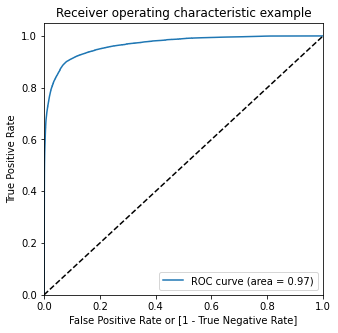

In [204]:
draw_roc(y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob)

In [205]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Fraud_Prob,predicted,Fraud,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.112303,0,0,1,1,0,0,0,0,0,0,0,0,0
1,0.174607,0,0,1,1,0,0,0,0,0,0,0,0,0
2,0.129540,0,0,1,1,0,0,0,0,0,0,0,0,0
3,0.723089,1,0,1,1,1,1,1,1,1,1,0,0,1
4,0.124431,0,0,1,1,0,0,0,0,0,0,0,0,0


In [206]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.747961  0.989006  0.506916
0.2   0.2  0.854893  0.961698  0.748087
0.3   0.3  0.896563  0.929451  0.863675
0.4   0.4  0.909986  0.902017  0.917955
0.5   0.5  0.904547  0.863349  0.945746
0.6   0.6  0.896201  0.830162  0.962241
0.7   0.7  0.883781  0.792378  0.975184
0.8   0.8  0.859015  0.731808  0.986223
0.9   0.9  0.815983  0.636945  0.995021


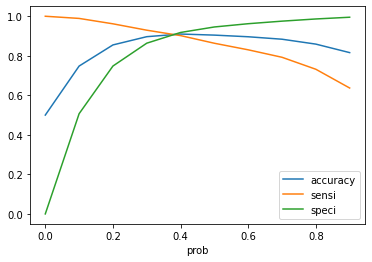

In [207]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [208]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Fraud_Prob,predicted,Fraud,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0.112303,0,0,1,1,0,0,0,0,0,0,0,0,0
1,0.174607,0,0,1,1,0,0,0,0,0,0,0,0,0
2,0.129540,0,0,1,1,0,0,0,0,0,0,0,0,0
3,0.723089,1,0,1,1,1,1,1,1,1,1,0,0,1
4,0.124431,0,0,1,1,0,0,0,0,0,0,0,0,0


In [209]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.final_predicted))

0.9099861826403718


In [210]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.final_predicted )
confusion2

array([[182696,  16329],
       [ 19501, 179524]])

In [211]:
get_all_measures(confusion2)

Sensitivity is : 0.90

specificity is : 0.92

false_positive_rate is : 0.08

negative_predictive_value is : 0.90

precision is : 0.92

recall is : 0.90



In [212]:
X_test = X_test[col]
X_test.head()

,V4,V5,V8,V13,V17,V22,V26,V27,V28
20720,1.238463,0.577223,-0.153353,1.008584,1.393282,0.710916,-0.458668,0.264585,0.217842
179064,1.097346,0.487790,-0.491782,0.117022,0.744338,0.567811,0.720585,-0.552023,0.071479
70783,-0.629588,-0.882185,0.209904,-0.888843,-0.036473,0.176549,0.832291,0.104558,0.175458
192473,1.852522,11.926410,0.499491,0.578595,-0.651946,0.272041,0.143550,-0.162356,0.559321
95055,-0.153580,-0.102880,0.043104,0.485765,-0.611823,-0.420666,0.044150,0.377499,0.171900


In [213]:
X_test_sm = sm.add_constant(X_test)

In [214]:
y_test_pred = res.predict(X_test_sm)

In [215]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [216]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [225]:
# Appending y_test_df and y_pred_1
y_pred_final_test = pd.concat([y_test_df, y_pred_1],axis=1)

In [226]:
y_pred_final_test.head()

,Class,0
20720,0,0.208415
179064,0,0.145606
70783,0,0.065155
192473,0,0.765492
95055,0,0.136541


In [227]:
# Renaming the column 
y_pred_final_test= y_pred_final.rename(columns={ 0 : 'Fraud_Prob'})

In [228]:
y_pred_final_test['final_predicted'] = y_pred_final_test.Fraud_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [230]:
y_pred_final_test.head()

,Class,Fraud_Prob,final_predicted
20720,0,0.208415,0
179064,0,0.145606,0
70783,0,0.065155,0
192473,0,0.765492,1
95055,0,0.136541,0


In [232]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred_final_test.Class, y_pred_final_test.final_predicted))

0.9087812927916857


In [233]:
confusion2 = metrics.confusion_matrix(y_pred_final_test.Class, y_pred_final_test.final_predicted )
confusion2

array([[77489,  7781],
       [   13,   160]])

In [234]:
get_all_measures(confusion2)

Sensitivity is : 0.92

specificity is : 0.91

false_positive_rate is : 0.09

negative_predictive_value is : 1.00

precision is : 0.02

recall is : 0.92



# The precision in test data is very low. There are lots of false positives. 